# Text Classification Assignment

## Importing Module and Reading Data

In [37]:
import pandas as pd
# Read data into df
file="C:/Users/prave/Downloads/airlines_reviews.csv/airlines_reviews.csv"
df=pd.read_csv(file) 
# Print head
df.head(40)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes
5,“seat is absolutely dreadful”,Robert Watson,2024-02-19,Singapore Airlines,True,This flight was over six hours long on a B737...,Solo Leisure,February 2024,Singapore to Cairns,Economy Class,5,1,5,5,1,3,no
6,Very ordinary service,S Holger,2024-02-19,Singapore Airlines,True,"Boarding process went smoothly, and plane le...",Solo Leisure,February 2024,Singapore to Frankfurt,Economy Class,1,3,1,2,2,5,no
7,I like flying this airline,A Jabil,2024-02-19,Singapore Airlines,True,Pleasant flight which operated on time. Chec...,Family Leisure,February 2024,Singapore to Bandar Seri Begawan,Economy Class,2,5,3,4,5,10,yes
8,left me deeply disappointed,A Kalarsan,2024-02-18,Singapore Airlines,True,I embarked on a journey with high hopes and ...,Business,February 2024,Singapore to Jakarta,Economy Class,5,4,5,5,3,4,no
9,can’t fault a single aspect,S Dayle,2024-02-17,Singapore Airlines,True,"No queue at check-in, and boarding at the ga...",Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,4,5,4,3,5,10,yes


## Let’s Plot the Rating Field

<Axes: xlabel='Class'>

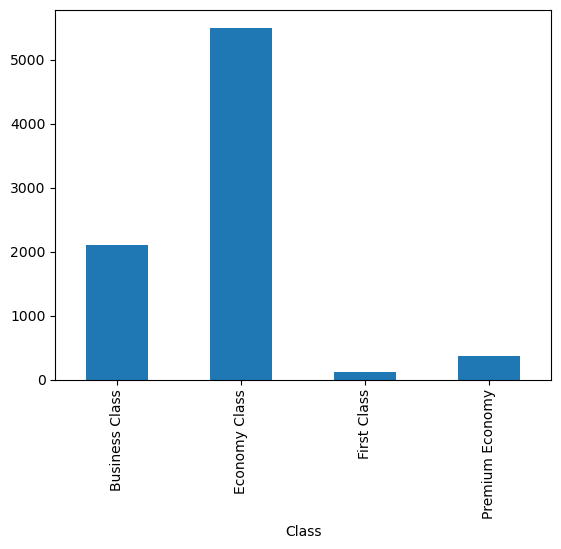

In [38]:
# Plotting the bar plot
df['Class'].value_counts().sort_index().plot(kind='bar')

## Let's Look at Published Platform

<Axes: xlabel='Overall Rating'>

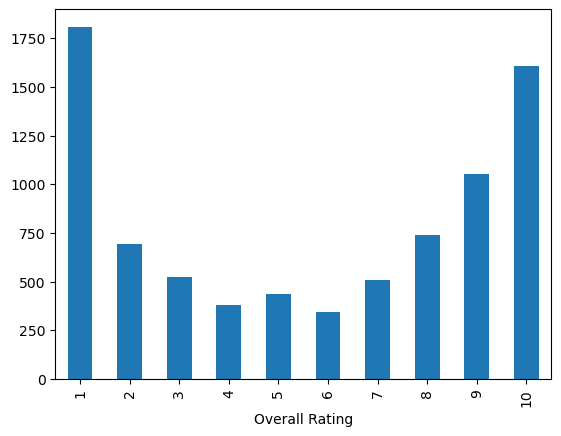

In [39]:
#Plotting the bar plot
df['Overall Rating'].value_counts().sort_index().plot(kind='bar')

## Function to Remove Any Odd Words

In [40]:
import html
import re
def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

## Data Cleaning

In [41]:
df = df[['Title','Class','Overall Rating']]
df = df.dropna()
df['Text'] = df['Title'] + ' ' + df['Class']
df = df.drop(columns=['Title','Class']) 
df['Text'] = df['Text'].apply(clean)
df = df[df['Text'].str.len() > 50]
df.sample(2)

,Overall Rating,Text
3960,10,pleased with our Emirates experience Business ...
4767,1,missed that flight with another airline Econom...


## Train-Test Split

In [42]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['Text'],
                                                    df['Overall Rating'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Overall Rating'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  683
Size of Test Data  171


## Converting X_train to Numbers

In [43]:
#Transforming the test data into TF-IDF features using the same vectorizer fitted on training data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

## Building the Model

In [44]:
# Fitting the classifier to the training data
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

C:\Users\prave\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

## Accuracy of the Model

In [45]:
from sklearn.metrics import accuracy_score
# Using the trained model to make predictions on the test data
Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))

Accuracy Score -  0.30409356725146197


## Run Dummy

In [46]:
# Calculating and printing the accuracy score
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred_baseline))

Accuracy Score -  0.29239766081871343


## Confusion Matrix

In [47]:
# Confusion Matrix Calculation
from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)

array([[38,  0,  1,  0,  0,  0,  2,  2,  0,  7],
       [13,  0,  0,  0,  0,  0,  0,  0,  1,  5],
       [ 7,  0,  1,  0,  0,  0,  0,  0,  0,  2],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  5],
       [ 8,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  1,  6],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  2,  5],
       [ 1,  0,  0,  0,  1,  2,  0,  1,  2,  4],
       [ 6,  0,  0,  0,  0,  0,  0,  3,  0,  6],
       [10,  0,  0,  0,  0,  2,  0,  1,  3, 12]], dtype=int64)

## Visualize Confusion Matrix

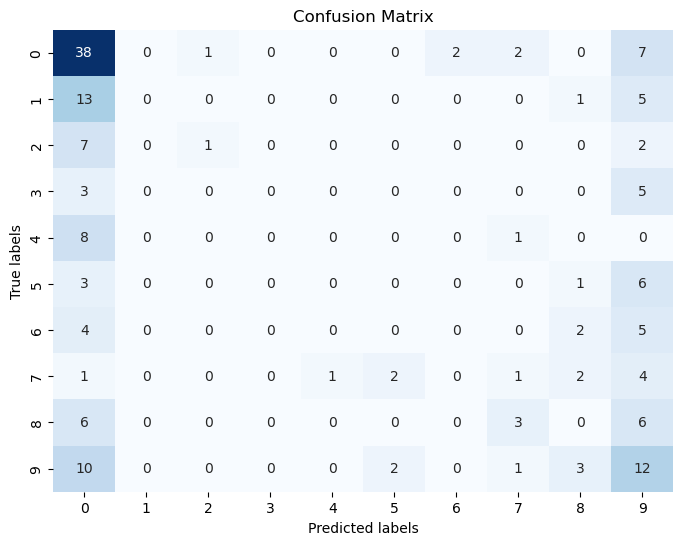

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, model1.predict(X_test_tf))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Generating and printing the classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.41      0.76      0.53        50
           2       0.00      0.00      0.00        19
           3       0.50      0.10      0.17        10
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        11
           8       0.12      0.09      0.11        11
           9       0.00      0.00      0.00        15
          10       0.23      0.43      0.30        28

    accuracy                           0.30       171
   macro avg       0.13      0.14      0.11       171
weighted avg       0.19      0.30      0.22       171



C:\Users\prave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Downsampling

In [50]:
# Filter bug reports with rating 4 and sample 4000 rows from it
df_sampleP3 = df[df['Overall Rating'] == 5].sample(n=4000, random_state=123, replace=True)

# Create a separate dataframe containing all other bug reports
df_sampleRest = df[df['Overall Rating'] != 5]

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sampleP3])

# Check the status of the class imbalance
df_balanced['Overall Rating'].value_counts()

Overall Rating
5     4000
1      250
10     137
2       95
9       75
7       57
8       55
3       51
6       50
4       41
Name: count, dtype: int64

## Loading the Balanced Dataframe

In [51]:
df = df_balanced[['Text', 'Overall Rating']]
df = df.dropna()

# Step 1 - Data Preparation

df['Text'] = df['Text'].apply(clean)

# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['Text'],
                                                    df['Overall Rating'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Overall Rating'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

# Step 3 - Training the Machine Learning model

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

# Step 4 - Model Evaluation

X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Size of Training Data  3848
Size of Test Data  963


C:\Users\prave\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score -  0.877466251298027
              precision    recall  f1-score   support

           1       0.38      0.58      0.46        50
           2       0.17      0.05      0.08        19
           3       0.25      0.10      0.14        10
           4       0.00      0.00      0.00         8
           5       0.99      1.00      1.00       801
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        11
           8       0.11      0.09      0.10        11
           9       0.22      0.13      0.17        15
          10       0.23      0.36      0.28        28

    accuracy                           0.88       963
   macro avg       0.24      0.23      0.22       963
weighted avg       0.86      0.88      0.87       963



In [54]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
# Flag that determines the choice of SVC (True) and LinearSVC (False)
runSVC = True
# Loading the dataframe
file = "C:/Users/prave/Downloads/airlines_reviews.csv/airlines_reviews.csv"
df = pd.read_csv(file)
df = df[['Title', 'Class', 'Overall Rating']]
df = df.dropna()
df['Text'] = df['Title'] + df['Class']
df = df.drop(columns=['Title', 'Class'])
# Step 1 - Data Preparation
df['Text'] = df['Text'].apply(clean)
df = df[df['Text'].str.len() > 50]
if (runSVC):
    # Sample the data when running SVC to ensure reasonable run-times
    df = df.groupby('Overall Rating', as_index=False).apply(pd.DataFrame.sample,
                                                       random_state=42,
                                                       frac=.2)
# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['Text'],
                                                    df['Overall Rating'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Overall Rating'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])
# Step 3 - Training the Machine Learning model
tfidf = TfidfVectorizer(stop_words="english")
if (runSVC):
    model = SVC(random_state=42, probability=True)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__kernel': ['linear']
    }]
else:
    model = LinearSVC(random_state=42, tol=1e-5)
    grid_param = {
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__loss': ['hinge']
    }
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words="english")), ('model', model)])
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
                                   param_grid=grid_param,
                                   cv=5)
gridSearchProcessor.fit(X_train, Y_train)
best_params = gridSearchProcessor.best_params_
print("Best alpha parameter identified by grid search ", best_params)

best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

best_model = gridSearchProcessor.best_estimator_

# Step 4 - Model Evaluation

Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Size of Training Data  116
Size of Test Data  29
Best alpha parameter identified by grid search  {'model__C': 1, 'model__kernel': 'linear', 'tfidf__min_df': 10, 'tfidf__ngram_range': (1, 3)}
Best result identified by grid search  0.28442028985507245
Accuracy Score -  0.3103448275862069
              precision    recall  f1-score   support

           1       0.31      1.00      0.47         9
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4

    accuracy                           0.31        29
   macro avg       0.03      0.10      0.05        29
weighted 

C:\Users\prave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\prave\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
